## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0   4.073016  298.956223  0.588062  6.816454  175.883063
1  60.135186  672.733540  0.779811  6.168825  528.135967
2  60.604229  326.984837  0.195083  9.452380   88.116719
3  74.322821  415.323312  0.842704  5.365339  357.809647
4  21.022315  286.888324  0.069371  6.258050   28.864696


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0214045	total: 57.7ms	remaining: 57.6s
1:	learn: 1.0080909	total: 58.2ms	remaining: 29s
2:	learn: 0.9972207	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9846516	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9713625	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9592482	total: 60ms	remaining: 9.94s
6:	learn: 0.9448880	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9337114	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9206403	total: 61.1ms	remaining: 6.73s
9:	learn: 0.9074513	total: 61.5ms	remaining: 6.09s
10:	learn: 0.8940902	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8802426	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8675422	total: 62.7ms	remaining: 4.76s
13:	learn: 0.8572692	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8448723	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8348035	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8242233	total: 64.9ms	remaining: 3.75s
17:	learn: 0.8137614	total: 65.4ms	remaining: 3.57s
18:	learn: 0.8046503	total: 65.8ms	remaining: 3.

113:	learn: 0.2488266	total: 105ms	remaining: 817ms
114:	learn: 0.2463781	total: 106ms	remaining: 813ms
115:	learn: 0.2431335	total: 106ms	remaining: 808ms
116:	learn: 0.2405722	total: 106ms	remaining: 802ms
117:	learn: 0.2378826	total: 107ms	remaining: 799ms
118:	learn: 0.2358306	total: 107ms	remaining: 794ms
119:	learn: 0.2328460	total: 108ms	remaining: 789ms
120:	learn: 0.2308760	total: 108ms	remaining: 785ms
121:	learn: 0.2282054	total: 108ms	remaining: 781ms
122:	learn: 0.2254229	total: 109ms	remaining: 776ms
123:	learn: 0.2233028	total: 109ms	remaining: 773ms
124:	learn: 0.2211139	total: 110ms	remaining: 768ms
125:	learn: 0.2182652	total: 110ms	remaining: 765ms
126:	learn: 0.2161413	total: 111ms	remaining: 764ms
127:	learn: 0.2136426	total: 112ms	remaining: 760ms
128:	learn: 0.2106793	total: 112ms	remaining: 755ms
129:	learn: 0.2082991	total: 112ms	remaining: 752ms
130:	learn: 0.2061873	total: 113ms	remaining: 747ms
131:	learn: 0.2043378	total: 113ms	remaining: 743ms
132:	learn: 

300:	learn: 0.0554162	total: 185ms	remaining: 429ms
301:	learn: 0.0549862	total: 185ms	remaining: 429ms
302:	learn: 0.0547178	total: 186ms	remaining: 428ms
303:	learn: 0.0544092	total: 186ms	remaining: 427ms
304:	learn: 0.0542034	total: 187ms	remaining: 425ms
305:	learn: 0.0539436	total: 187ms	remaining: 424ms
306:	learn: 0.0536769	total: 187ms	remaining: 423ms
307:	learn: 0.0533026	total: 188ms	remaining: 422ms
308:	learn: 0.0529598	total: 188ms	remaining: 421ms
309:	learn: 0.0527365	total: 189ms	remaining: 420ms
310:	learn: 0.0524360	total: 189ms	remaining: 419ms
311:	learn: 0.0520410	total: 189ms	remaining: 418ms
312:	learn: 0.0518077	total: 190ms	remaining: 417ms
313:	learn: 0.0515712	total: 190ms	remaining: 416ms
314:	learn: 0.0514026	total: 191ms	remaining: 415ms
315:	learn: 0.0511888	total: 191ms	remaining: 414ms
316:	learn: 0.0510093	total: 191ms	remaining: 412ms
317:	learn: 0.0507155	total: 192ms	remaining: 411ms
318:	learn: 0.0503422	total: 192ms	remaining: 410ms
319:	learn: 

544:	learn: 0.0185742	total: 287ms	remaining: 239ms
545:	learn: 0.0184544	total: 287ms	remaining: 239ms
546:	learn: 0.0183368	total: 288ms	remaining: 238ms
547:	learn: 0.0182212	total: 288ms	remaining: 238ms
548:	learn: 0.0181198	total: 288ms	remaining: 237ms
549:	learn: 0.0180247	total: 289ms	remaining: 236ms
550:	learn: 0.0179589	total: 289ms	remaining: 236ms
551:	learn: 0.0179091	total: 290ms	remaining: 235ms
552:	learn: 0.0178160	total: 290ms	remaining: 234ms
553:	learn: 0.0177501	total: 290ms	remaining: 234ms
554:	learn: 0.0176588	total: 291ms	remaining: 233ms
555:	learn: 0.0175841	total: 291ms	remaining: 233ms
556:	learn: 0.0175362	total: 292ms	remaining: 232ms
557:	learn: 0.0174419	total: 292ms	remaining: 231ms
558:	learn: 0.0173951	total: 293ms	remaining: 231ms
559:	learn: 0.0172952	total: 293ms	remaining: 230ms
560:	learn: 0.0172675	total: 293ms	remaining: 229ms
561:	learn: 0.0172403	total: 294ms	remaining: 229ms
562:	learn: 0.0172135	total: 294ms	remaining: 228ms
563:	learn: 

733:	learn: 0.0087318	total: 366ms	remaining: 133ms
734:	learn: 0.0086972	total: 366ms	remaining: 132ms
735:	learn: 0.0086657	total: 367ms	remaining: 131ms
736:	learn: 0.0086316	total: 367ms	remaining: 131ms
737:	learn: 0.0086133	total: 367ms	remaining: 130ms
738:	learn: 0.0085825	total: 368ms	remaining: 130ms
739:	learn: 0.0085486	total: 368ms	remaining: 129ms
740:	learn: 0.0085184	total: 369ms	remaining: 129ms
741:	learn: 0.0084854	total: 369ms	remaining: 128ms
742:	learn: 0.0084677	total: 369ms	remaining: 128ms
743:	learn: 0.0084322	total: 370ms	remaining: 127ms
744:	learn: 0.0083993	total: 370ms	remaining: 127ms
745:	learn: 0.0083703	total: 371ms	remaining: 126ms
746:	learn: 0.0083379	total: 371ms	remaining: 126ms
747:	learn: 0.0083094	total: 372ms	remaining: 125ms
748:	learn: 0.0082775	total: 372ms	remaining: 125ms
749:	learn: 0.0082495	total: 372ms	remaining: 124ms
750:	learn: 0.0082220	total: 373ms	remaining: 124ms
751:	learn: 0.0081908	total: 373ms	remaining: 123ms
752:	learn: 

974:	learn: 0.0045074	total: 467ms	remaining: 12ms
975:	learn: 0.0044897	total: 468ms	remaining: 11.5ms
976:	learn: 0.0044867	total: 468ms	remaining: 11ms
977:	learn: 0.0044809	total: 469ms	remaining: 10.5ms
978:	learn: 0.0044657	total: 469ms	remaining: 10.1ms
979:	learn: 0.0044627	total: 469ms	remaining: 9.58ms
980:	learn: 0.0044449	total: 470ms	remaining: 9.1ms
981:	learn: 0.0044393	total: 470ms	remaining: 8.62ms
982:	learn: 0.0044210	total: 471ms	remaining: 8.14ms
983:	learn: 0.0044181	total: 471ms	remaining: 7.66ms
984:	learn: 0.0044120	total: 472ms	remaining: 7.18ms
985:	learn: 0.0043946	total: 472ms	remaining: 6.71ms
986:	learn: 0.0043928	total: 472ms	remaining: 6.22ms
987:	learn: 0.0043873	total: 473ms	remaining: 5.74ms
988:	learn: 0.0043819	total: 474ms	remaining: 5.27ms
989:	learn: 0.0043749	total: 474ms	remaining: 4.79ms
990:	learn: 0.0043724	total: 474ms	remaining: 4.3ms
991:	learn: 0.0043553	total: 475ms	remaining: 3.83ms
992:	learn: 0.0043493	total: 475ms	remaining: 3.35ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

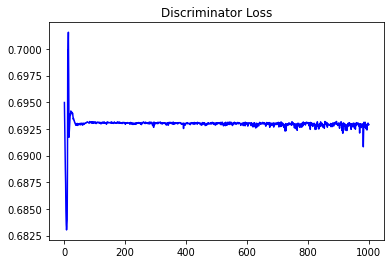

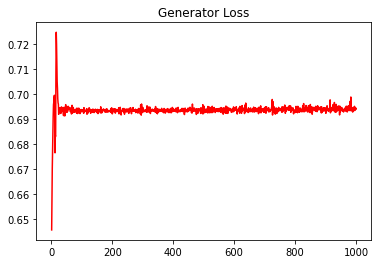

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.002374457543738156


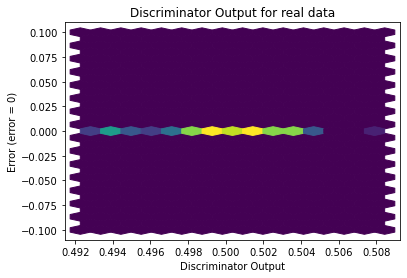

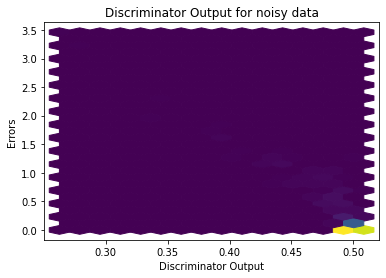

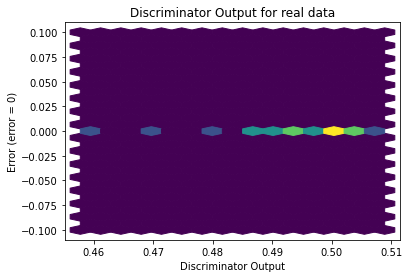

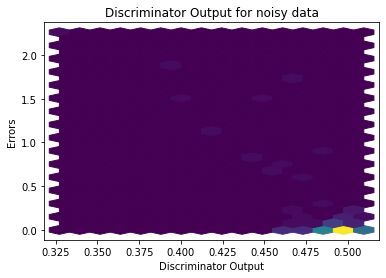

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


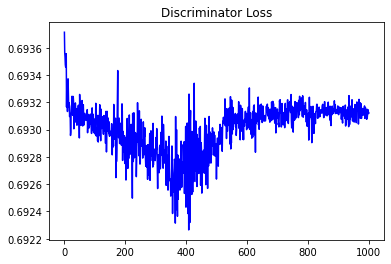

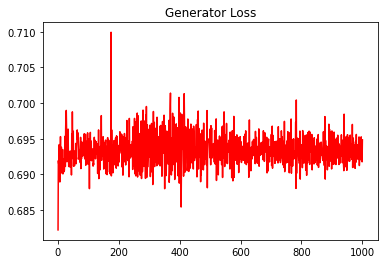

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003021420203960653


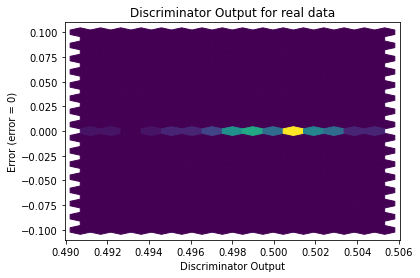

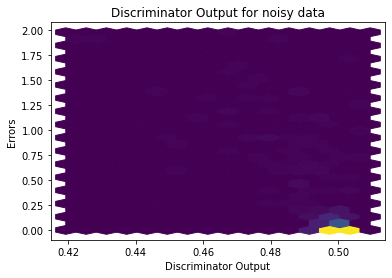

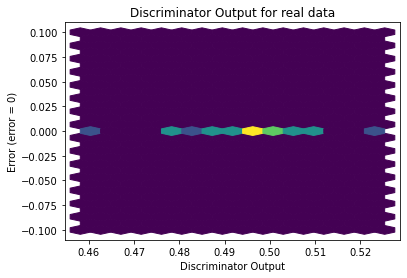

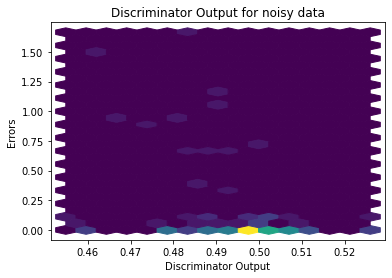

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1145]], requires_grad=True)
